[INFO] Training logistic regression model...
[INFO] Training random forest classifier model...
[INFO] Evaluating models...
Logistic Regression Accuracy: 0.8983050847457628
Random Forest Accuracy: 0.8011019943702462


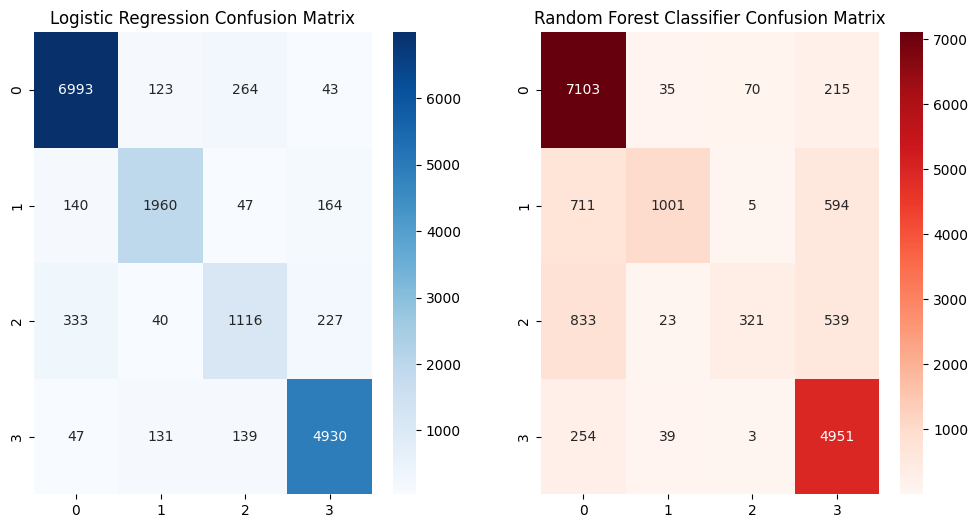

In [7]:
# imports required packages
import numpy as np
import h5py
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


# Configuration
config = {
    "test_size": 0.20,
    "seed": 8,
    "features_path": r"C:/Users/siva/Documents/OCT/OCT2017/features.h5",
    "labels_path": r"C:/Users/siva/Documents/OCT/OCT2017/labels.h5",
    "classifier_path": r"C:/Users/siva/Documents/OCT/OCT2017/classifier.pickle",
    "classifier_path_1": r"C:/Users/siva/Documents/OCT/OCT2017/classifier_1.pickle"
}

# Load data
h5f_data = h5py.File(config["features_path"], 'r')
h5f_label = h5py.File(config["labels_path"], 'r')

features = np.array(h5f_data['dataset_1'])
labels = np.array(h5f_label['dataset_1'])

h5f_data.close()
h5f_label.close()

# Data preprocessing
test_size = config["test_size"]
seed = config["seed"]
trainData, testData, trainLabels, testLabels = train_test_split(features, labels, test_size=test_size, random_state=seed)

# Model training
print("[INFO] Training logistic regression model...")
logistic_model = LogisticRegression(random_state=seed, max_iter=1000 , solver='saga')  # Increase max_iter
logistic_model.fit(trainData, trainLabels)


print("[INFO] Training random forest classifier model...")
rf_model = RandomForestClassifier(random_state=seed)
rf_model.fit(trainData, trainLabels)

# Save models
pickle.dump(logistic_model, open(config["classifier_path"], 'wb'))
pickle.dump(rf_model, open(config["classifier_path_1"], 'wb'))

# Model evaluation
print("[INFO] Evaluating models...")

# Logistic Regression
logistic_preds = logistic_model.predict(testData)
logistic_cm = confusion_matrix(testLabels, logistic_preds)

# Random Forest Classifier
rf_preds = rf_model.predict(testData)
rf_cm = confusion_matrix(testLabels, rf_preds)

# Calculate accuracies
logistic_accuracy = accuracy_score(testLabels, logistic_preds)
rf_accuracy = accuracy_score(testLabels, rf_preds)

print(f"Logistic Regression Accuracy: {logistic_accuracy}")
print(f"Random Forest Accuracy: {rf_accuracy}")

# Visualize confusion matrices
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.heatmap(logistic_cm, annot=True, cmap="Blues", fmt='g')
plt.title("Logistic Regression Confusion Matrix")

plt.subplot(1, 2, 2)
sns.heatmap(rf_cm, annot=True, cmap="Reds", fmt='g')
plt.title("Random Forest Classifier Confusion Matrix")

plt.show()
